In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart-1.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

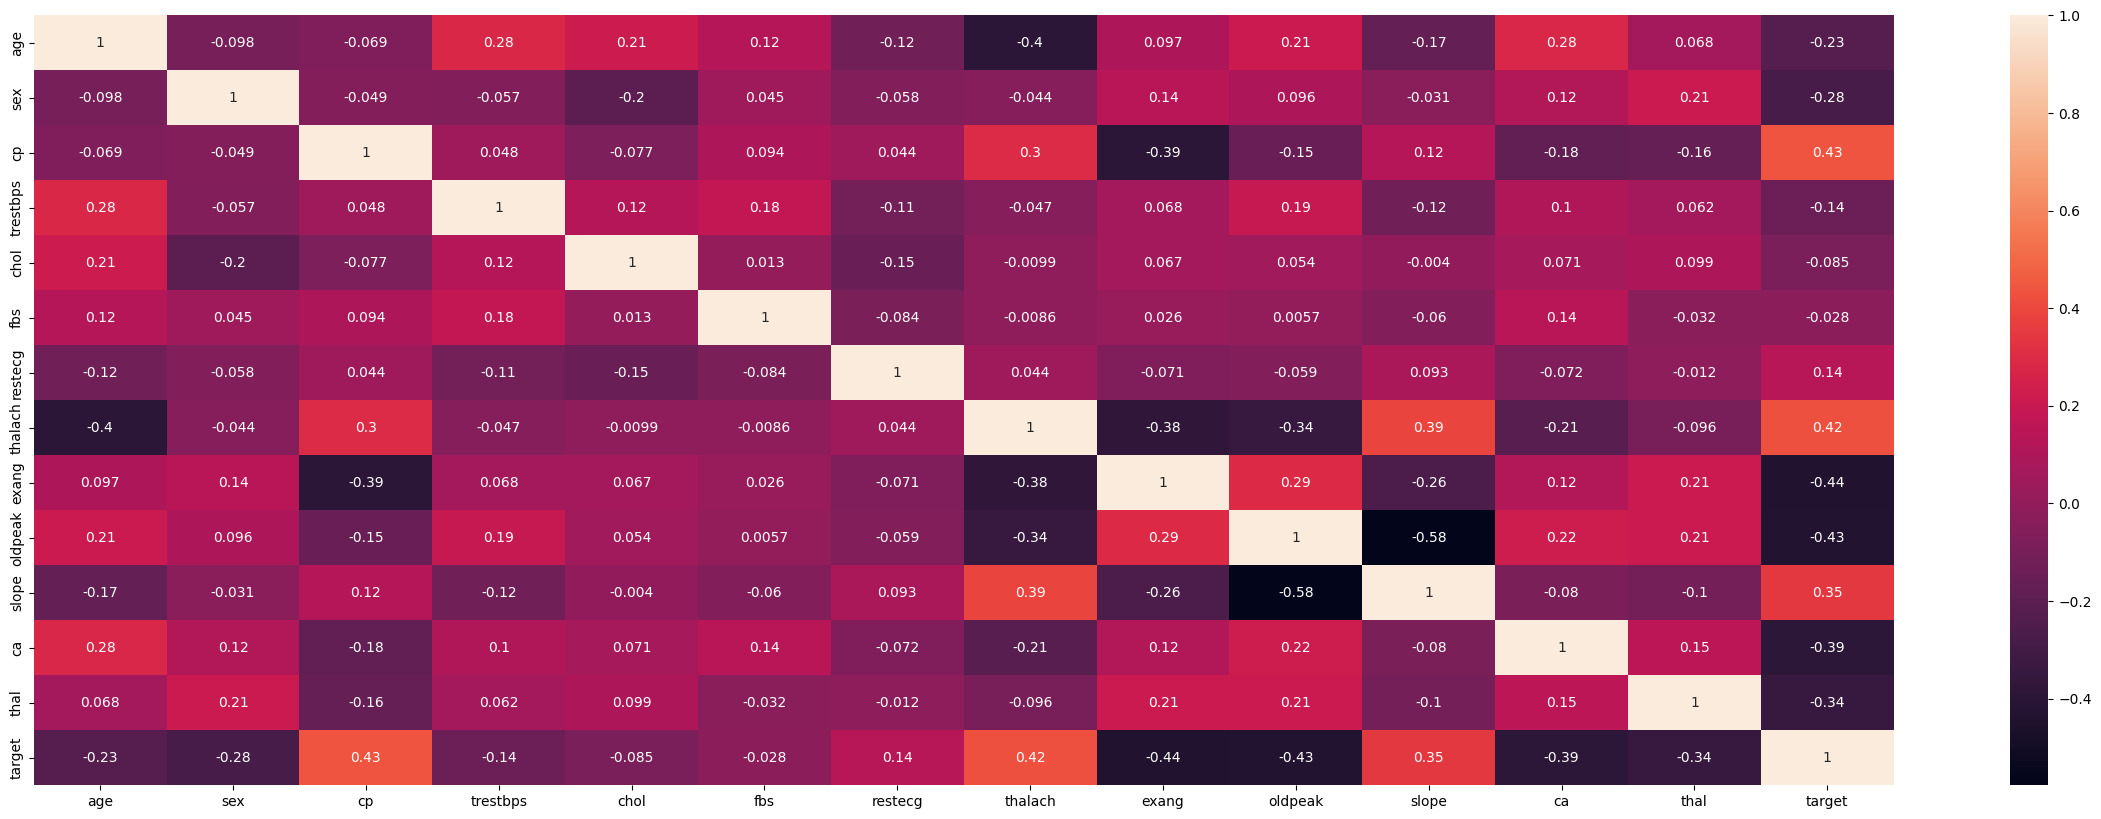

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: title={'center': 'Age Distribution'}>

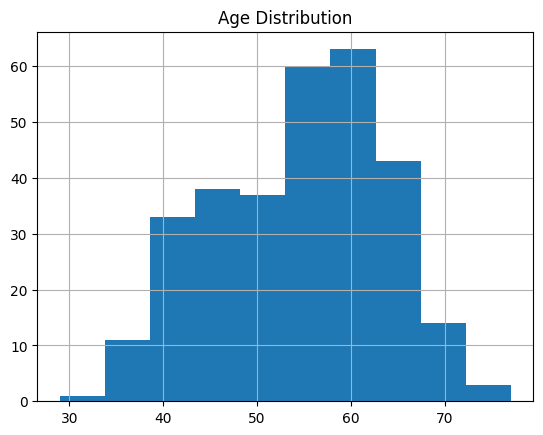

In [ ]:
plt.title('Age Distribution')
df['age'].hist(bins=10)

<Axes: title={'center': 'Trestbps Distribution'}>

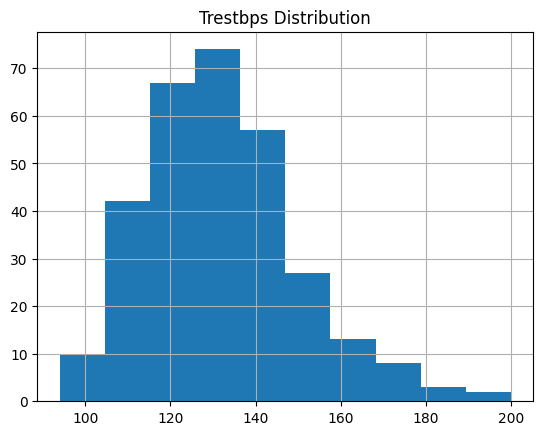

In [ ]:
plt.title('Trestbps Distribution')
df['trestbps'].hist(bins=10)

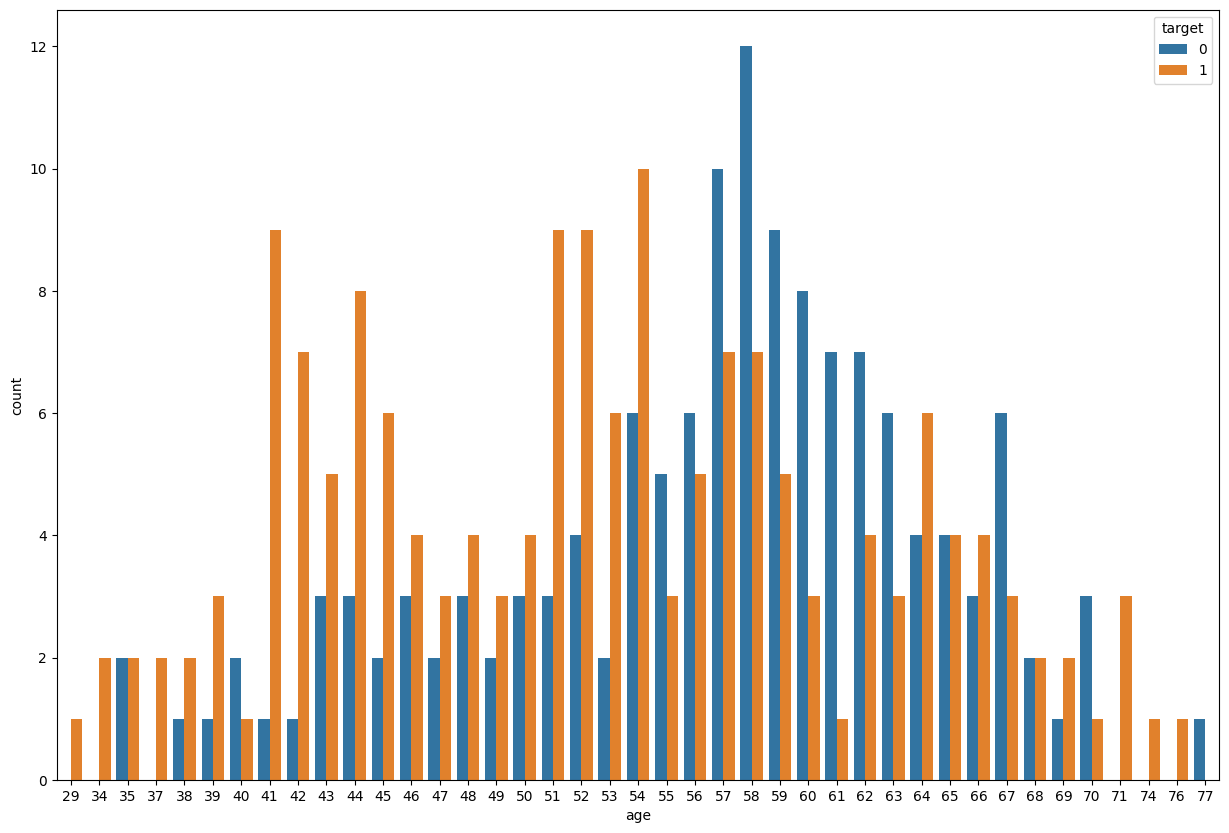

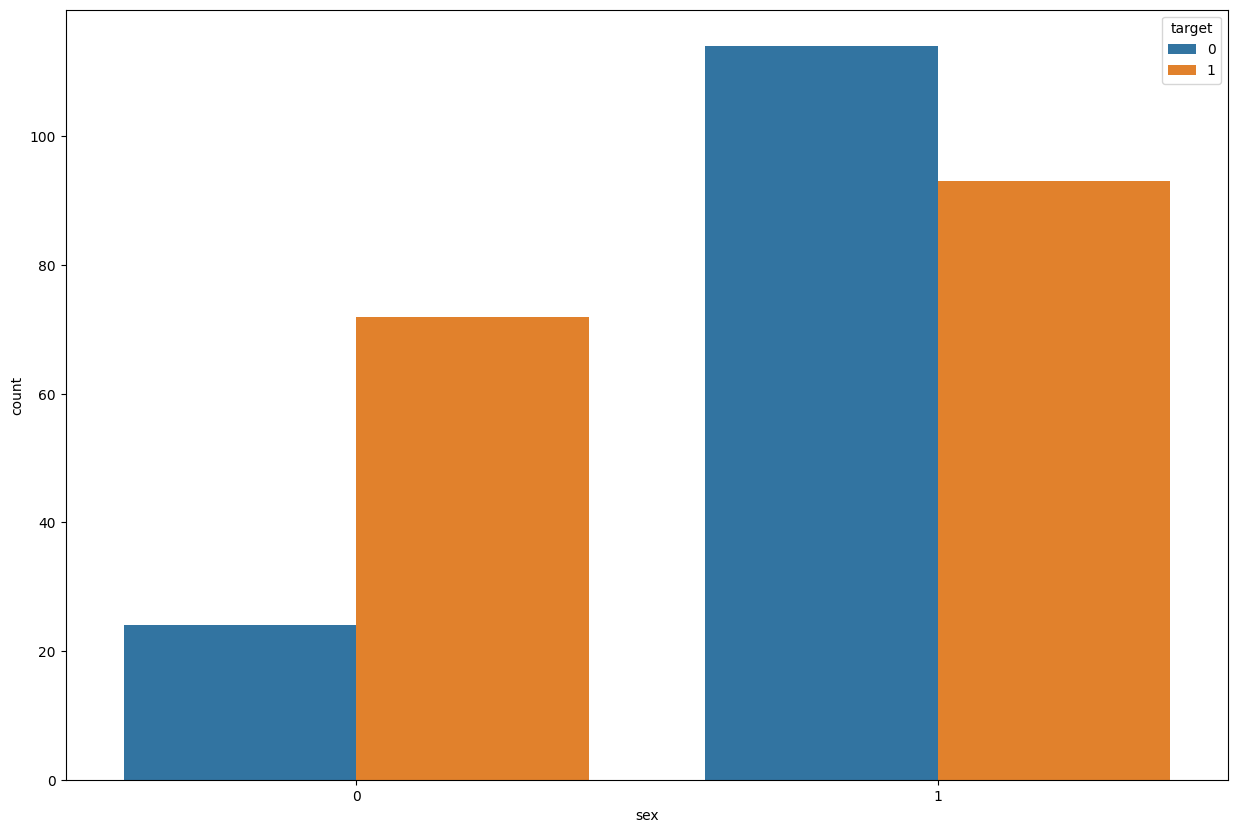

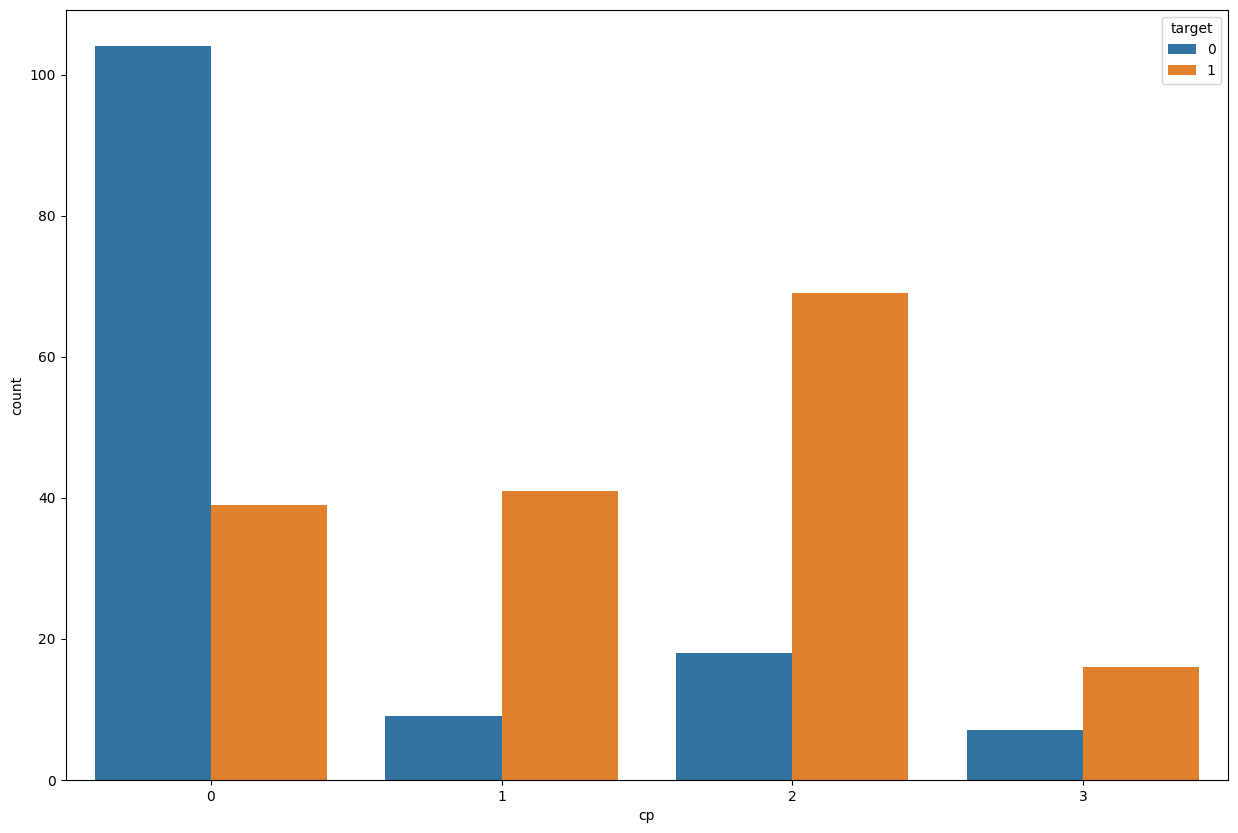

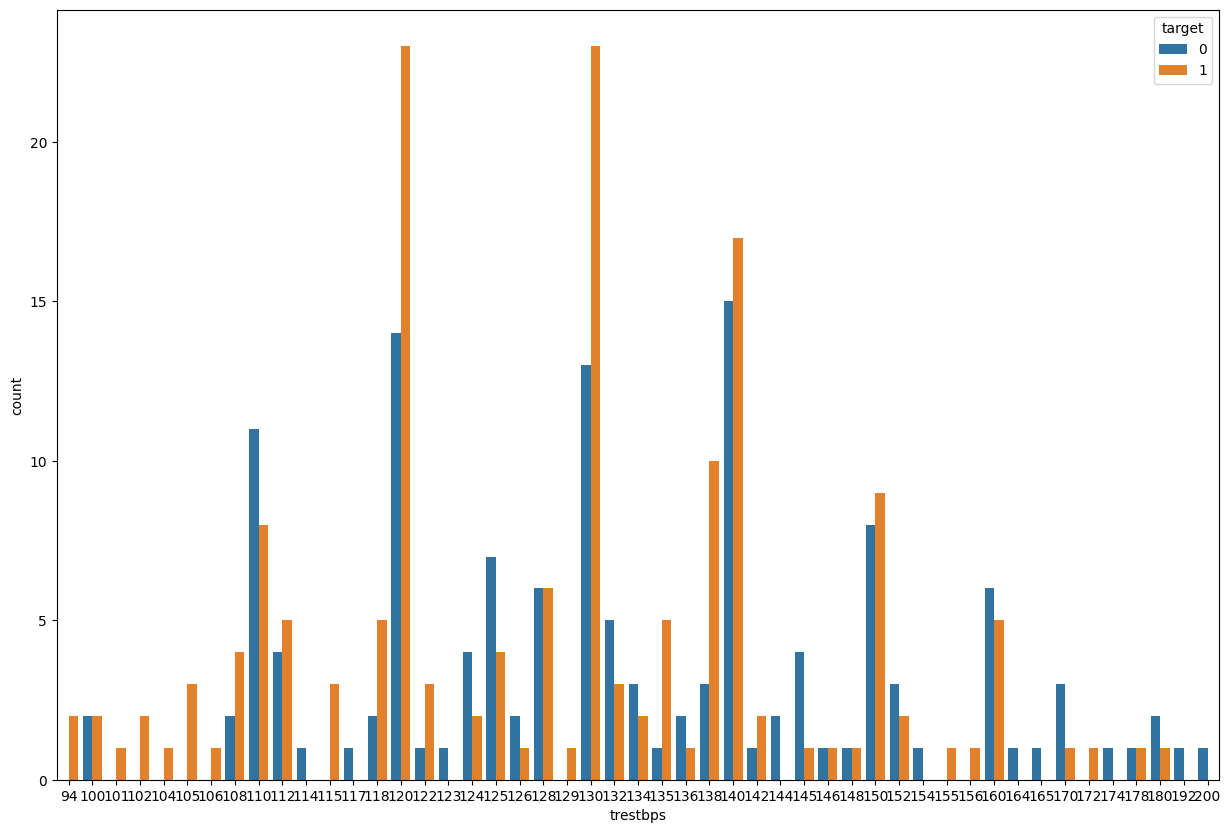

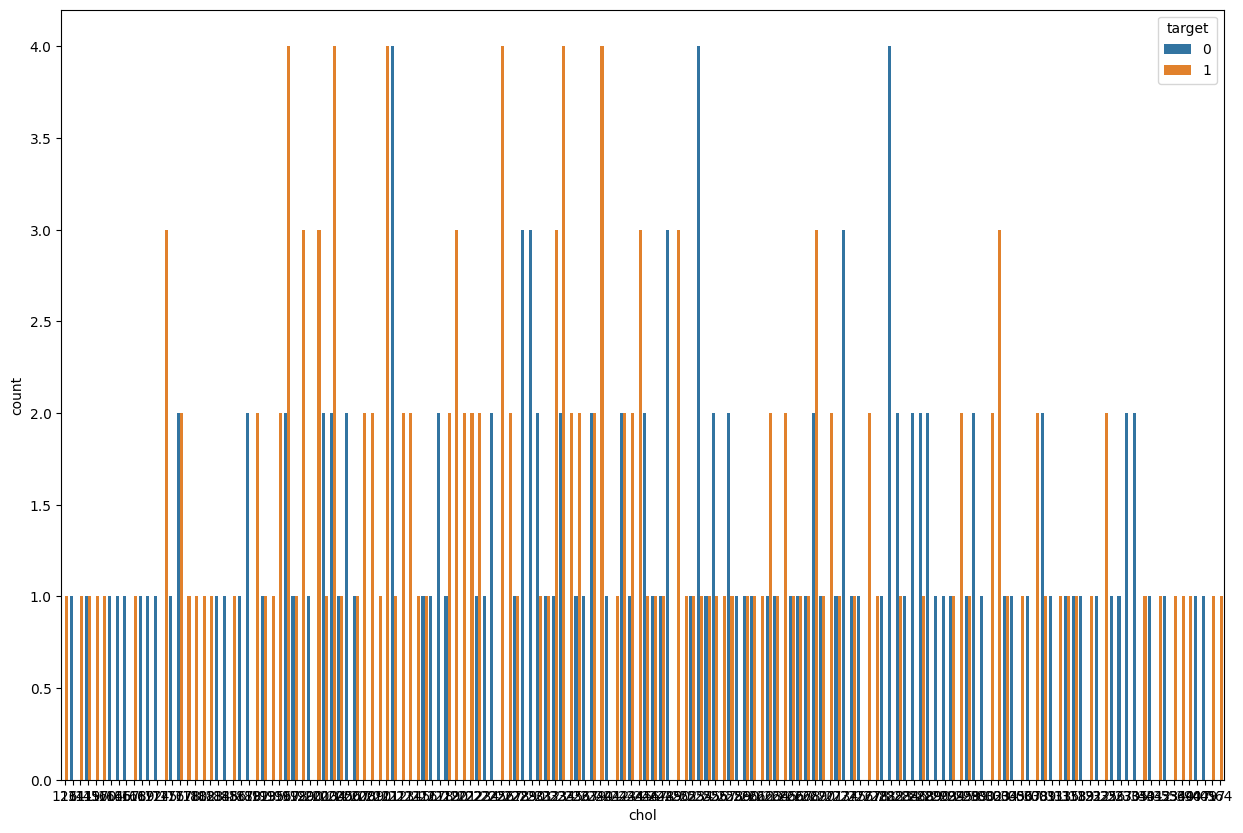

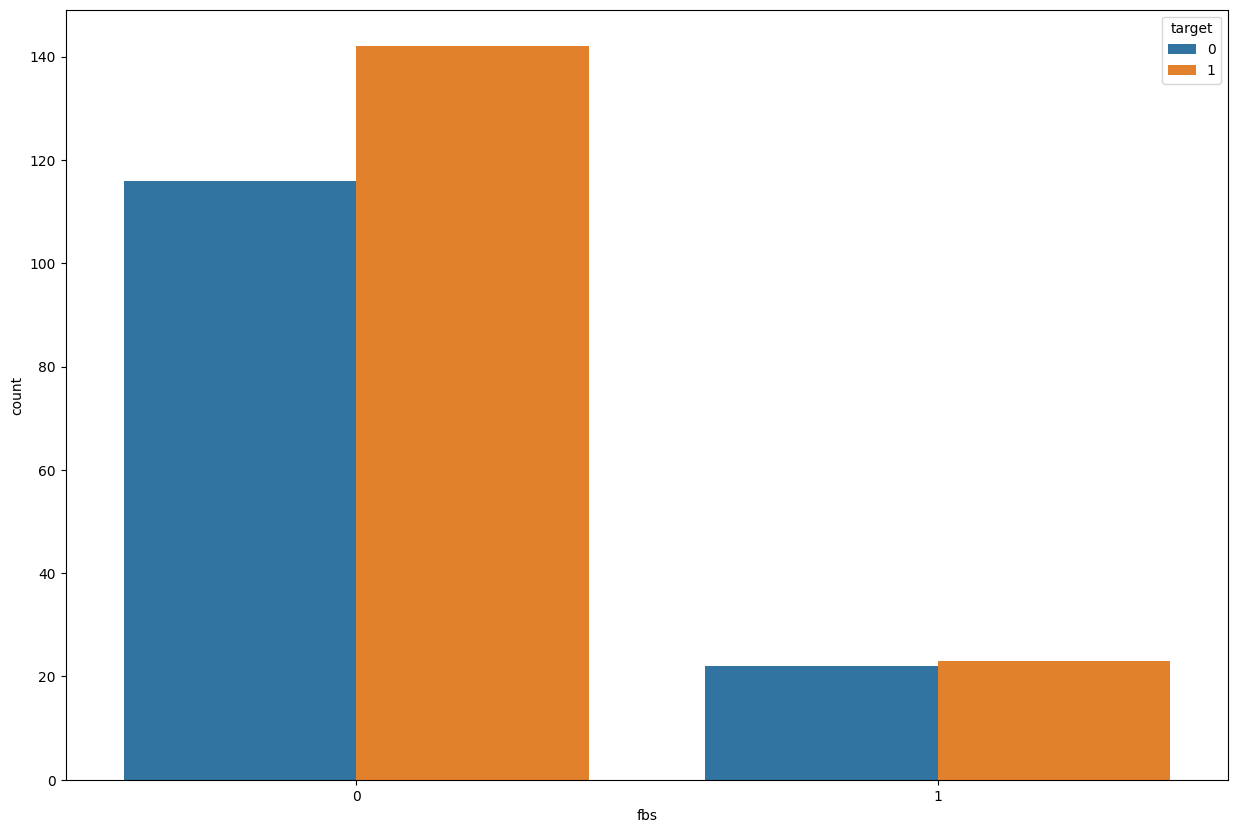

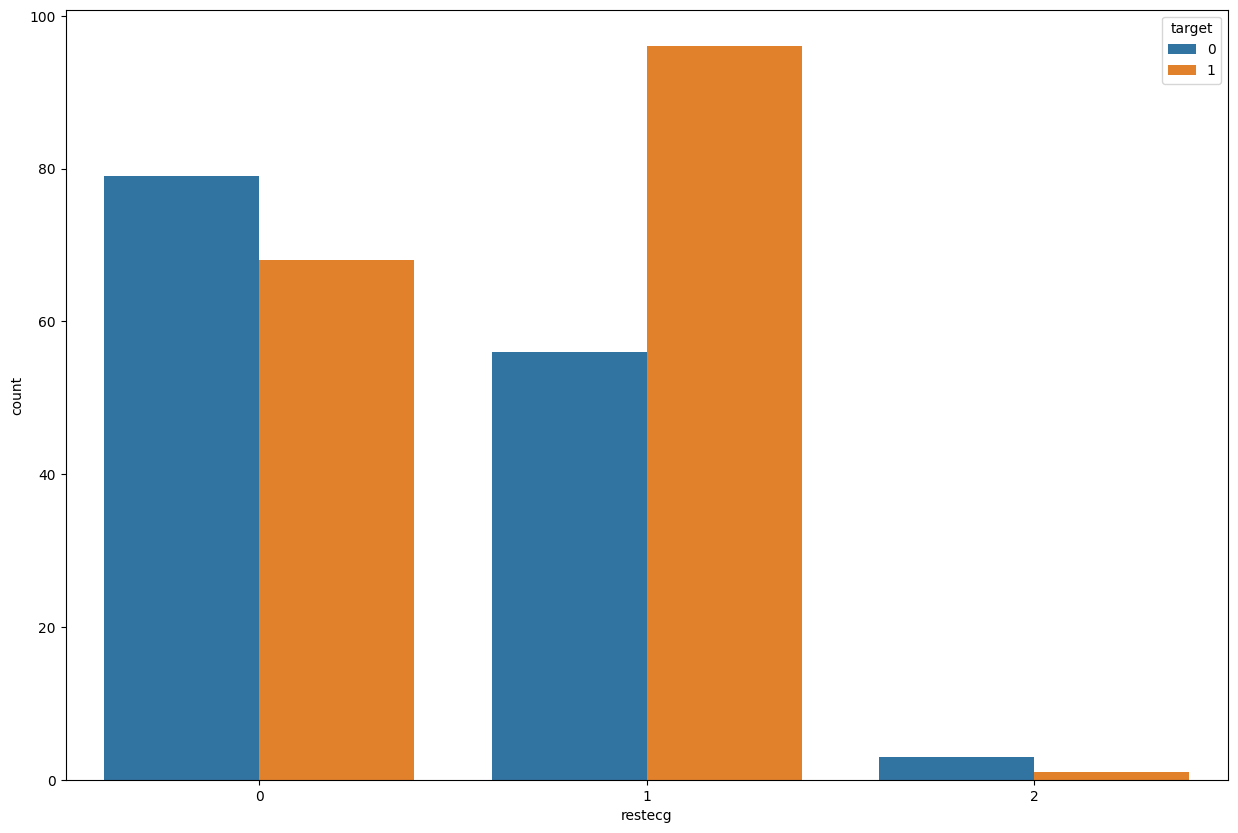

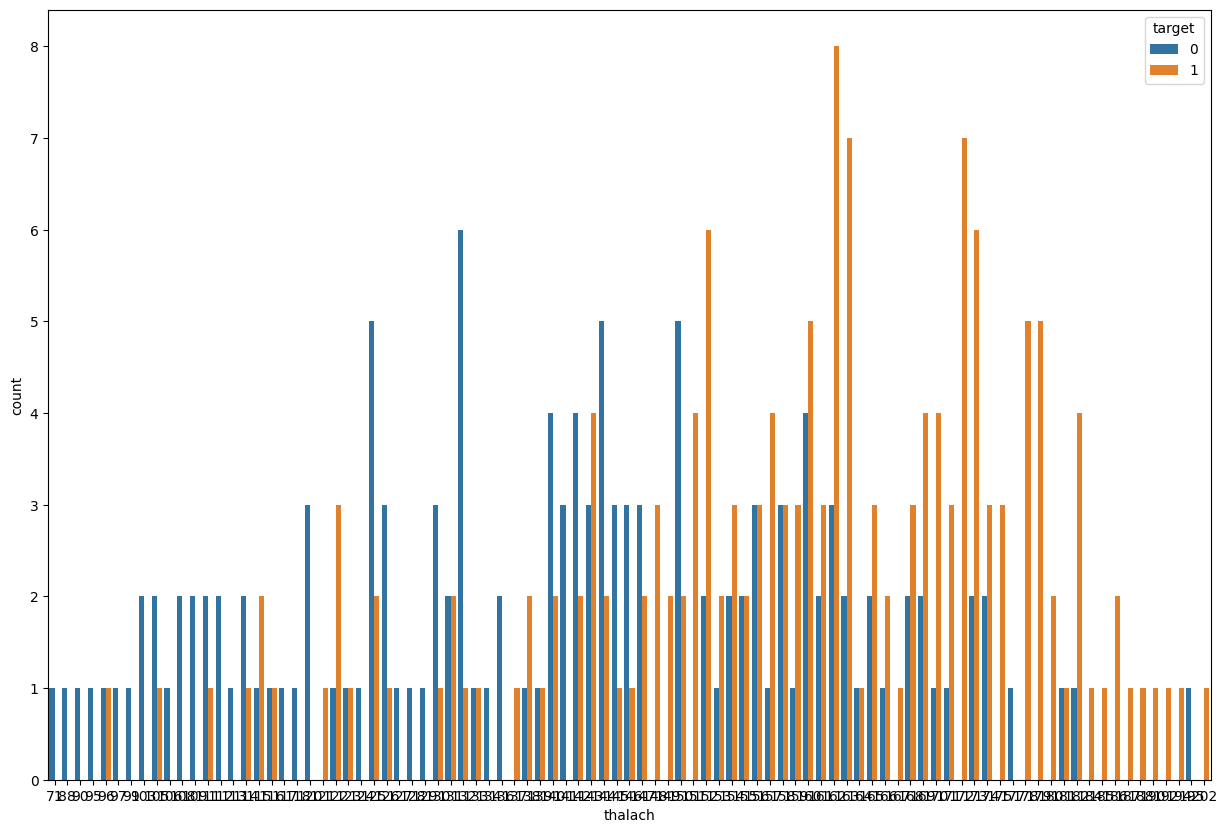

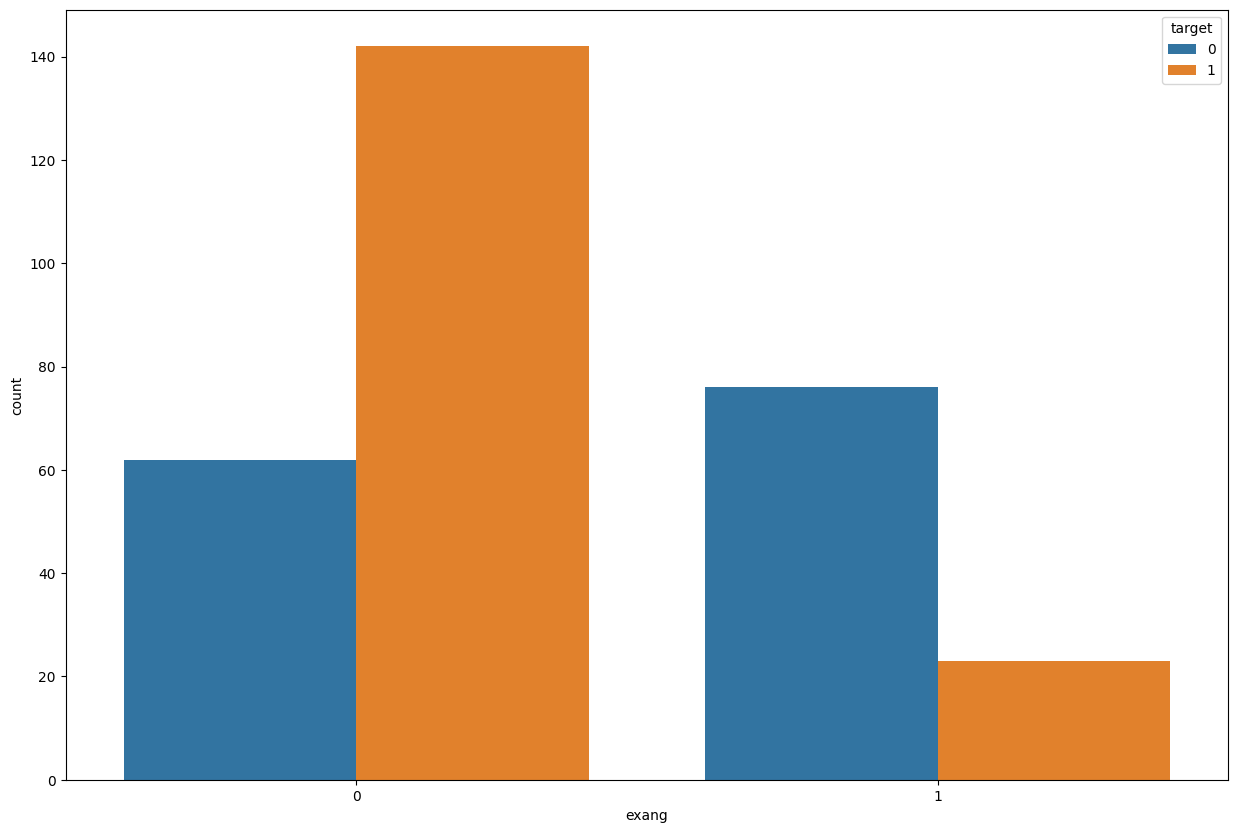

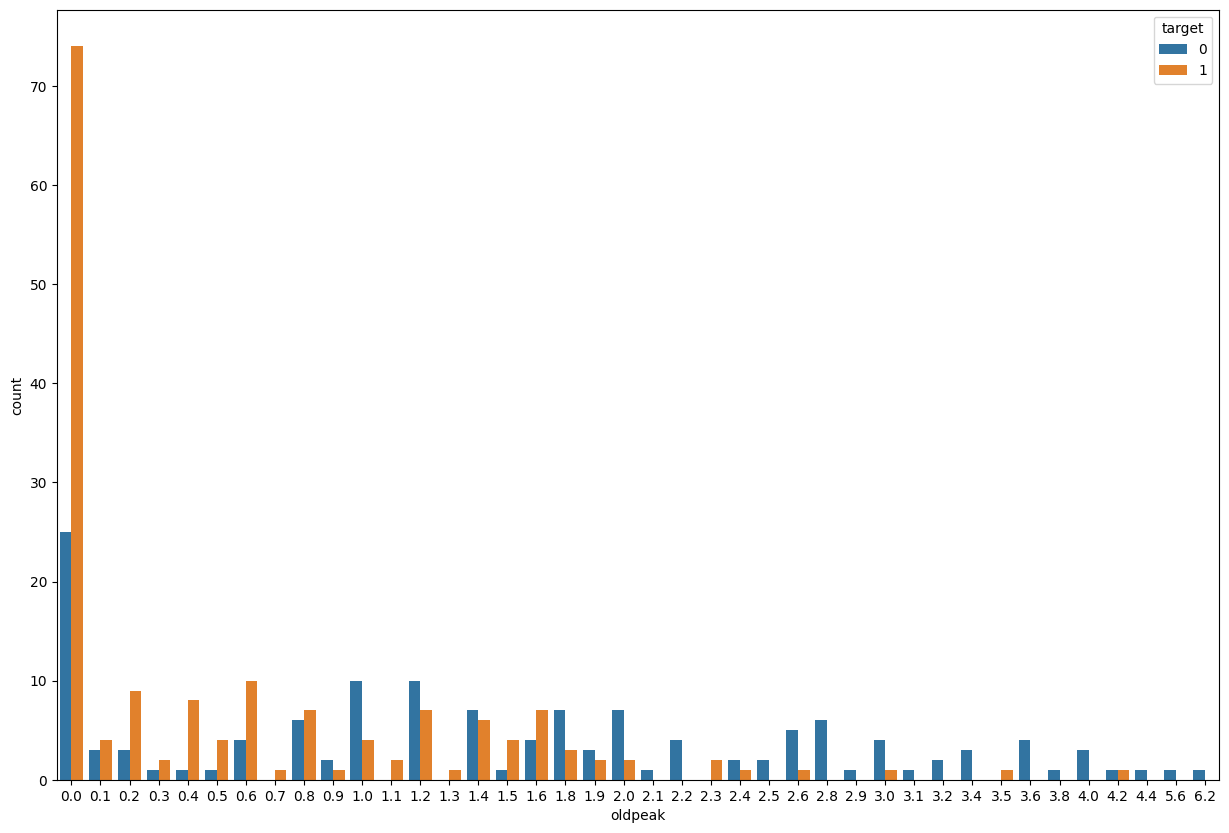

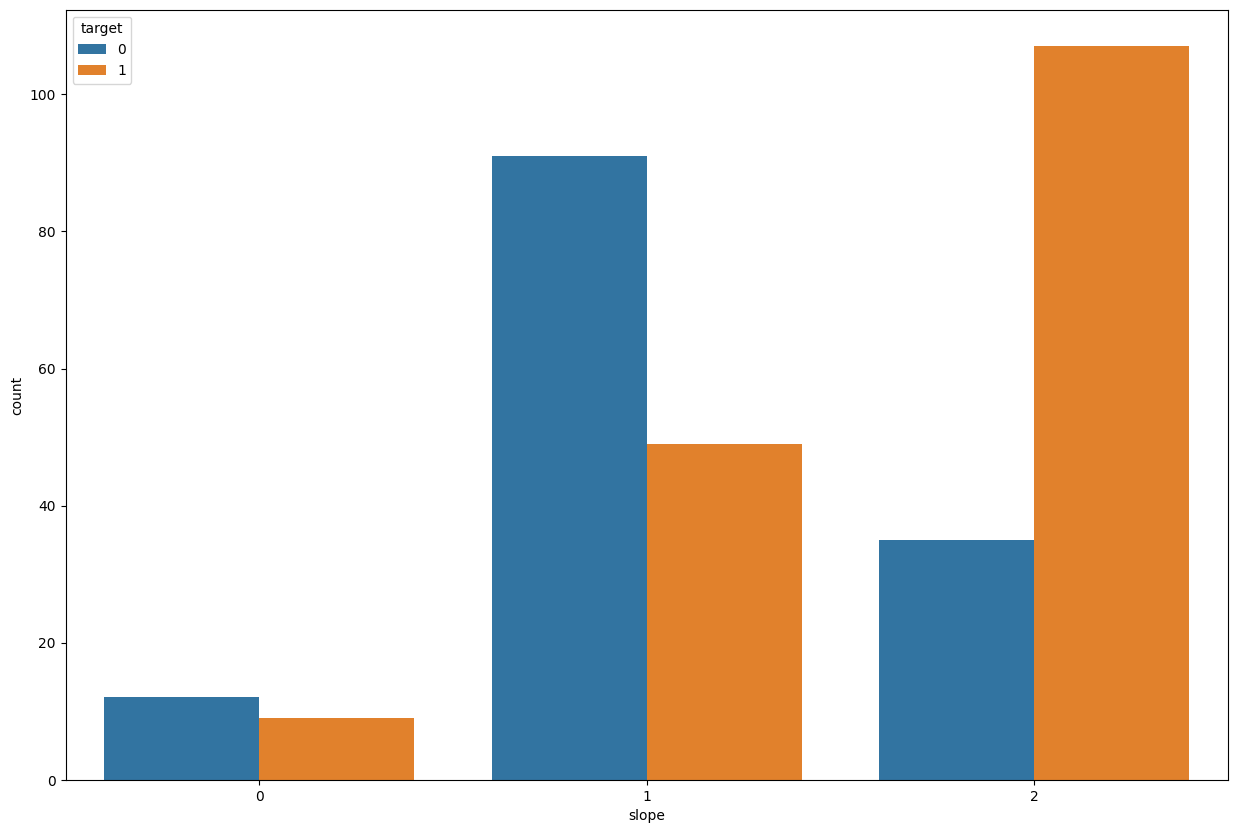

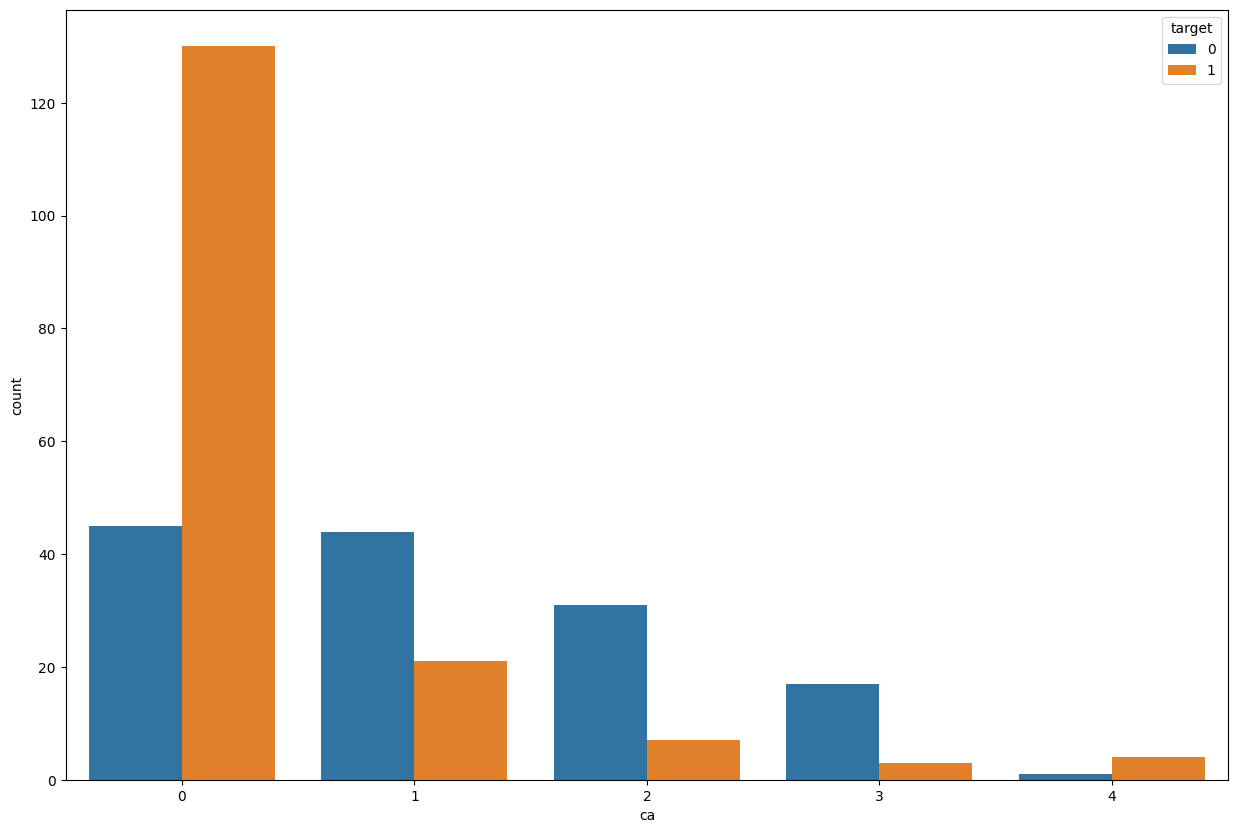

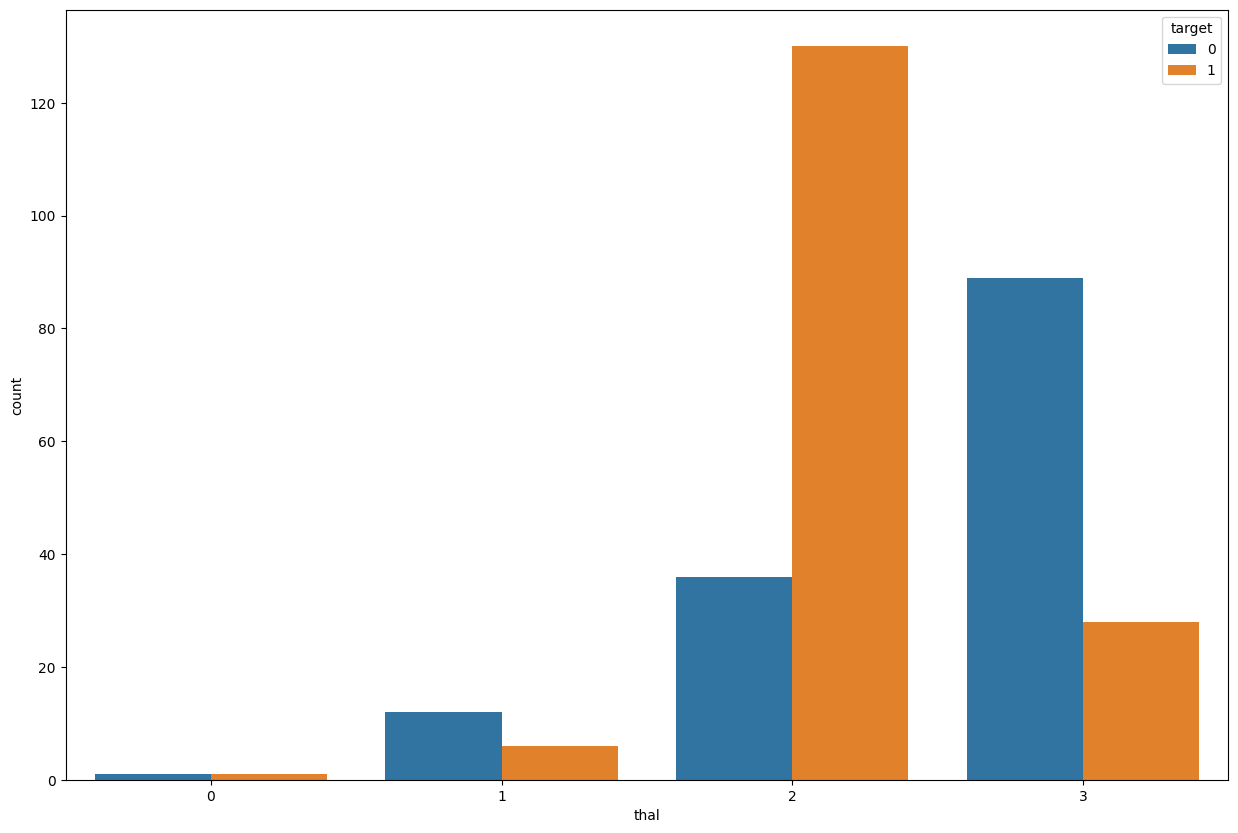

In [ ]:
cols = list(df.columns)
for col in cols:
  if col != 'target':
      plt.figure(figsize=(15,10))
      sns.countplot(data=df,x=col,hue='target')
      plt.show()

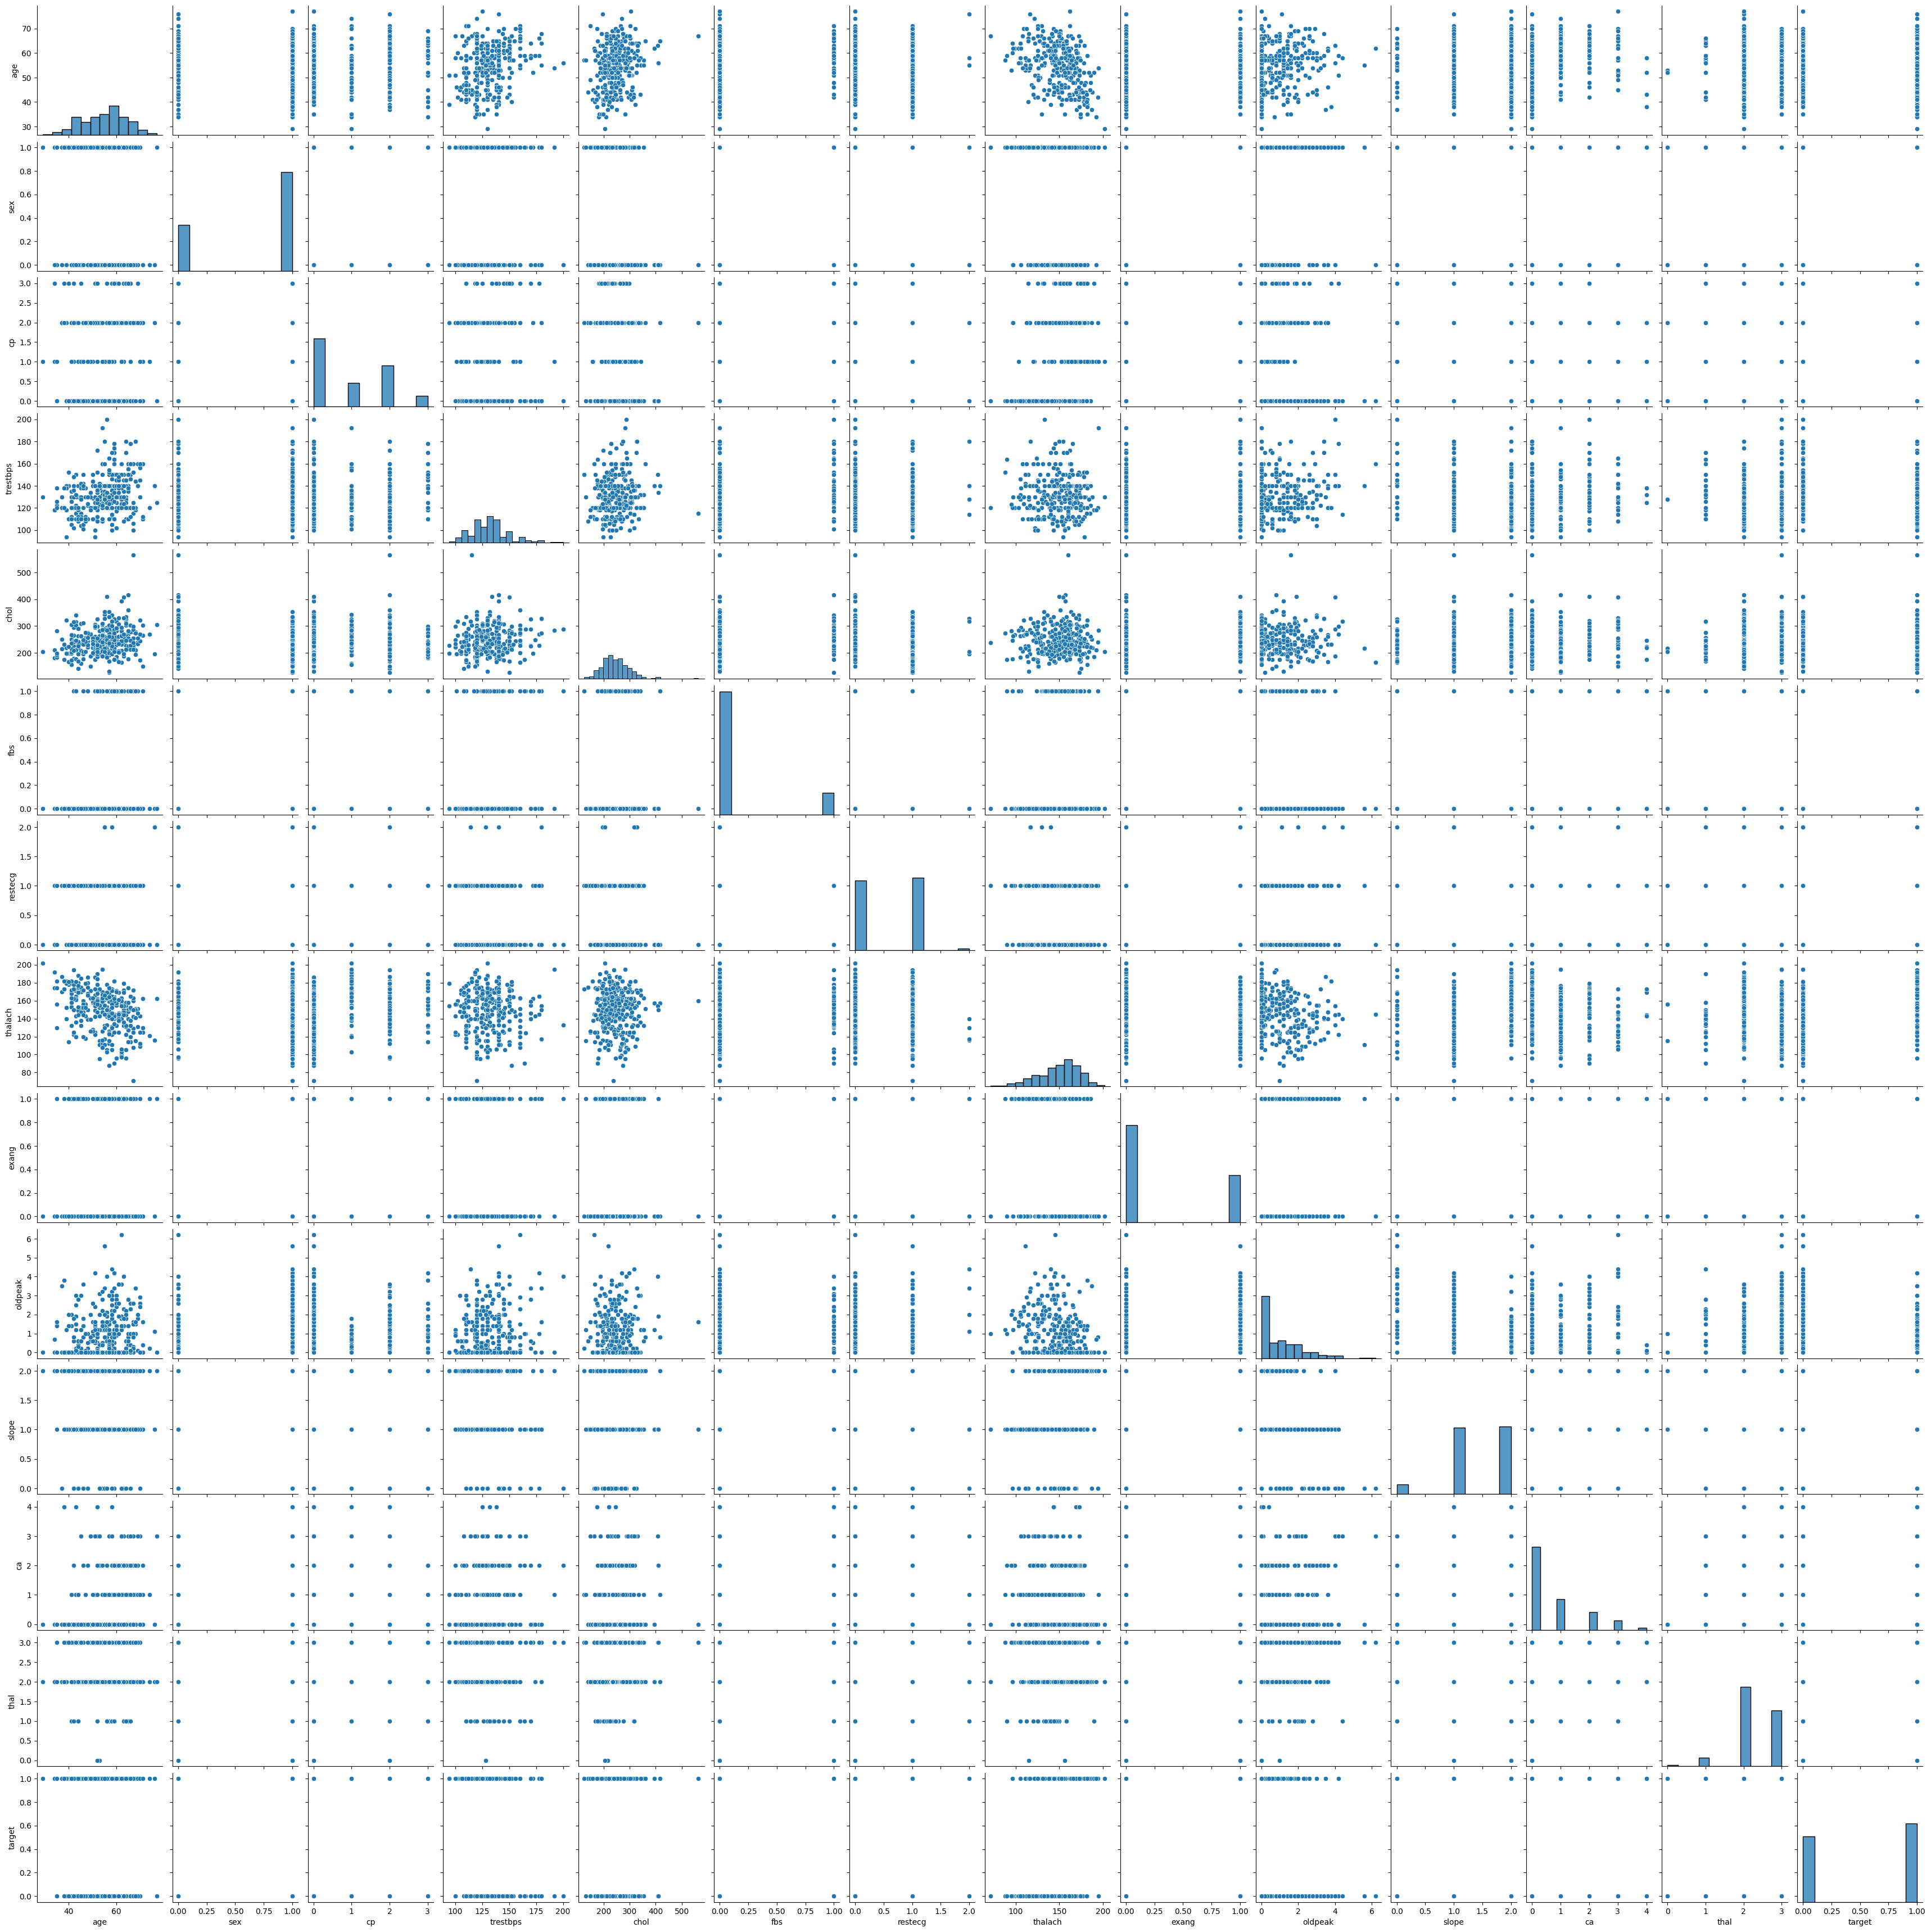

In [ ]:
sns.pairplot(df)

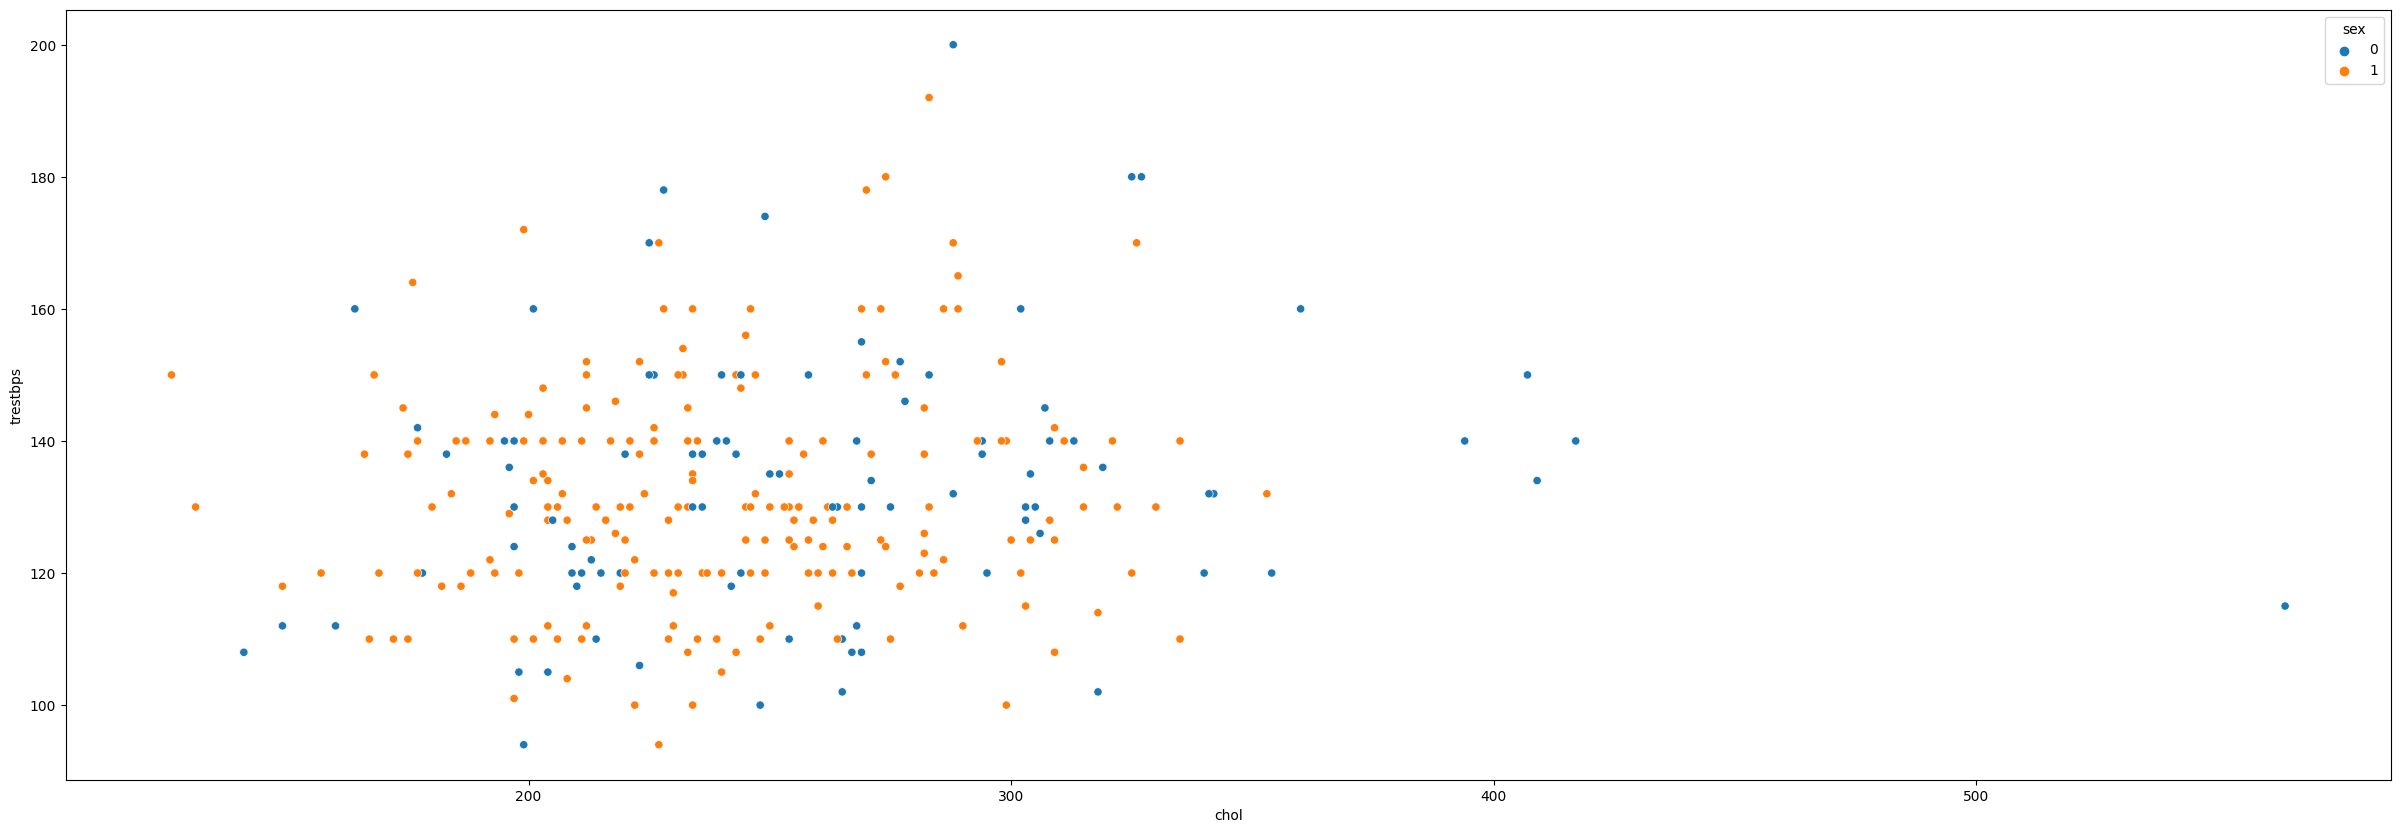

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df,hue='sex',x='chol',y='trestbps')
plt.show()

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(212, 13) (91, 13) (212,) (91,)


In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
y_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
def plot_cm(y_train_pred,y_train,dom):
  print(f'{dom} Confusion Matrix')
  cm = confusion_matrix(y_train_pred,y_train)
  sns.heatmap(cm,annot=True,fmt='g')
  plt.tight_layout()
  plt.show()

In [ ]:
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

1.0
0.7142857142857143


Training Data Confusion Matrix


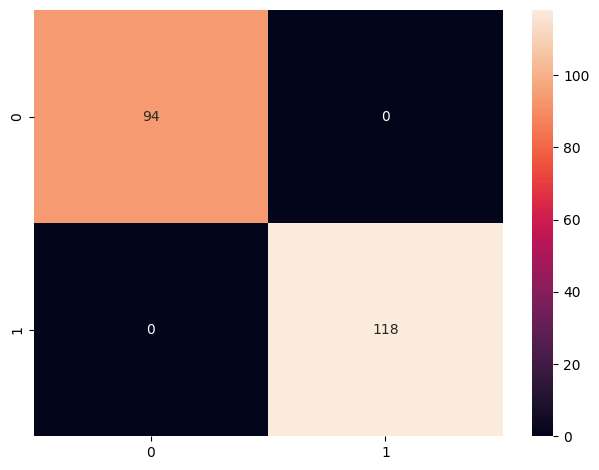

In [ ]:
plot_cm(y_train_pred,y_train,dom='Training Data')

Testing Data Confusion Matrix


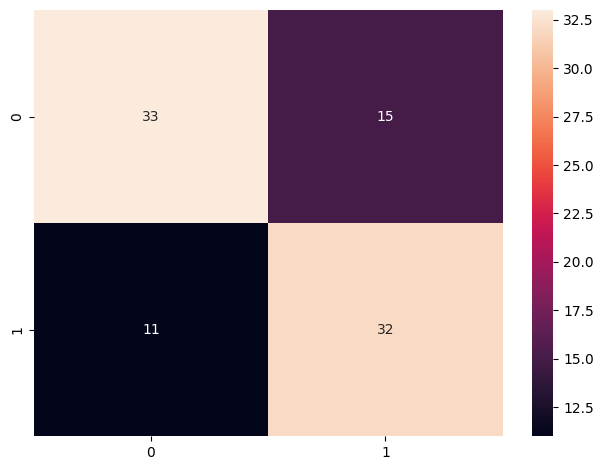

In [ ]:
plot_cm(y_test_pred,y_test,dom='Testing Data')

In [ ]:
c_parameter_name = 'Max_Depth'
c_parameter_values = list(range(1,50))
df_acc_test = pd.DataFrame(columns=[c_parameter_name])
for i in c_parameter_values:
  model = tree.DecisionTreeClassifier(max_depth=i,splitter='best')
  y_pred_train = model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc_score = accuracy_score(y_test,y_pred)*100
  df_acc_test = df_acc_test.append({c_parameter_name : i, 'Accuracy' : acc_score},ignore_index=True)

<ipython-input-72-52d6dabb94fc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_test = df_acc_test.append({c_parameter_name : i, 'Accuracy' : acc_score},ignore_index=True)
<ipython-input-72-52d6dabb94fc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_test = df_acc_test.append({c_parameter_name : i, 'Accuracy' : acc_score},ignore_index=True)
<ipython-input-72-52d6dabb94fc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_test = df_acc_test.append({c_parameter_name : i, 'Accuracy' : acc_score},ignore_index=True)
<ipython-input-72-52d6dabb94fc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_test = df_acc_te

In [ ]:
df_acc_test

,Max_Depth,Accuracy
0,1.0,76.923077
1,2.0,73.626374
2,3.0,81.318681
3,4.0,76.923077
4,5.0,73.626374
5,6.0,75.824176
6,7.0,75.824176
7,8.0,71.428571
8,9.0,71.428571
9,10.0,71.428571


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,splitter='best')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

Test Data Confusion Matrix


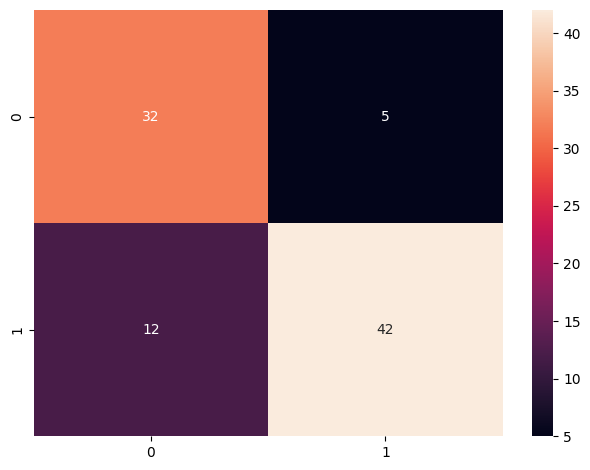

In [ ]:
plot_cm(y_test_pred,y_test,dom='Test Data')

In [ ]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91

